In [3]:
import pandas as pd

file = 'form.csv'

df = pd.read_csv(file)

Create Data Categories to be put into a new Data Frame

In [4]:
# Calculate the Age of Each Person

import datetime

def calculate_age(row):
  birthdate_str = row['When is your birthday?']
  timestamp_str = row['Timestamp']
  birthdate = datetime.datetime.strptime(birthdate_str, '%m/%d/%Y').date()
  timestamp = datetime.datetime.strptime(timestamp_str, '%m/%d/%Y').date()

  age = timestamp.year - birthdate.year - ((timestamp.month, timestamp.day) < (birthdate.month, birthdate.day))

  return int(age)


df['Age'] = df.apply(calculate_age, axis=1)


In [5]:
!pip install kerykeion


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install us


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

# Get the zodiac sign of each person

from kerykeion import AstrologicalSubject

zodiac_signs_dict = {
    'Gem': 'Gemini' ,
    'Sco': 'Scorpio',
    'Cap': 'Capricorn',
    'Aqu':'Aquarius',
    'Tau': 'Taurus',
    'Pis': 'Pisces',
    'Ari': 'Aries',
    'Sag': 'Sagitarius',
    'Can': 'Cancer',
    'Vir': 'Virgo',
    'Lib': 'Libra',
    'Leo': 'Leo'
}

def get_sign(row):

  # one of the values has the wrong year for age, 11/29/2023, but may be the right month and day

  birthdate_str = row['When is your birthday?']
  birthdate = datetime.datetime.strptime(birthdate_str, '%m/%d/%Y').date()

  person = AstrologicalSubject("Person", birthdate.year, birthdate.month, birthdate.day, 12, 00, "Atlanta")

  return person.sun.sign

df['Zodiac Sign'] = df.apply(get_sign, axis=1)

df['Zodiac Sign'] = df['Zodiac Sign'].replace(zodiac_signs_dict)


In [8]:
# Get the dance rating for each person
import numpy as np
def convert_to_int(x, length):

    if length > 1:
      if x[0] == '1' and x[1] == '0':
        return 10
    return int(x[0]) if x.isdigit() else np.nan

df['From one to ten, how good do you feel about the dance scene as a whole?'] = df['From one to ten, how good do you feel about the dance scene as a whole?'].astype(str)

df['Dance Rating'] = df['From one to ten, how good do you feel about the dance scene as a whole?'].apply(lambda x: convert_to_int(x, len(x)))


In [9]:
# use strip to clean the data
df['Which state  do you live in? If not in the USA, which country do you live in?'] = df['Which state  do you live in? If not in the USA, which country do you live in?'].str.strip()

In [10]:
# get the state

# map the us states

import us

def get_state(location):

    if us.states.lookup(location):
      print(us.states.lookup(location).name)
      return us.states.lookup(location).name
    else:
      return location

# df = df.rename(columns={'Which state  do you live in? If not in the USA, which country do you live in?': 'Location'})

df['Which state  do you live in? If not in the USA, which country do you live in?'] = df['Which state  do you live in? If not in the USA, which country do you live in?'].apply(lambda x: get_state(x))


Florida
Florida
Texas
Florida
Florida
Pennsylvania
Florida
Florida
Florida
Indiana
Florida
California
Iowa
Michigan
Massachusetts
Iowa
Texas
Minnesota
Michigan
New York
Illinois
Florida
Minnesota
California
Tennessee
Texas
Iowa
Florida
Texas
Florida
Indiana
Iowa
Alaska
Iowa
Colorado
Virginia
Wisconsin
California
Iowa
Florida
Florida
Florida
Florida
Iowa
Nebraska
Arizona
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Georgia
Texas
Florida
Florida
Massachusetts
Georgia
Florida
Florida
Florida
Florida
Florida
Florida
Texas
Texas
Michigan
Minnesota
Illinois
Iowa
Iowa
Florida
Washington
Minnesota
Florida
Illinois
Virginia
Kentucky
Texas
Florida
Florida
Florida
Florida
Iowa
Texas
Illinois
Minnesota
Florida
Florida
Florida
Missouri
Florida
Minnesota
Florida
North Carolina
Virginia
Florida
Massachusetts
North Carolina
Florida
Florida
Florida
Florida
Florida
New York
Florida
Florida
Michigan
Texas
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Arkansas
Florida
Arizona


In [11]:
# Rename the columns to be used for data handling

df['Gender'] = df['What is your gender?']
df['City'] = df['What city do you live in?']
df['Location'] = df['Which state  do you live in? If not in the USA, which country do you live in?']
df['Friendly Follows?'] = df['Do you feel like leads are friendly in your dance scene?']
df['Friendly Leads?'] = df['Do you feel like follows are friendly in your dance scene?']
df['Attendance'] = df['How often do you attend Latin dance events or socials?']
df['Level'] = df['What level are you in the dance that you dance the most?']
df['Dance Lessons'] = df['Have you ever taken dance lessons while in the dance scene?']
df['Opposite'] = df['Have you ever done the opposite (lead or follow)?']
df['Most Interested'] = df['Which dance do you like/interests you the most?']
df['Dance Scene'] = df['Which dance do you dance the most?']
df['Years in Dance Scene'] = df['How long have you been in the dance scene?']
df['Played a Sport'] = df['Did you play any sports regularly before joining the dance scene?']
df['Played an instrument'] = df['Did you play an instrument before joining the dance scene?']
df['Leader or Follower'] = df['Do you typically lead or follow?']

In [12]:
df['Location'].tolist()

['Florida',
 'Germany',
 'Florida',
 'Texas',
 'United States',
 'Florida',
 'Florida',
 'United Kingdom',
 'United States',
 'Pennsylvania',
 'Florida',
 'Florida',
 'Florida',
 'Indiana',
 'Florida',
 'California',
 'Iowa',
 'Michigan',
 'Massachusetts',
 'Iowa',
 'Texas',
 'Minnesota',
 'Michigan',
 'United Kingdom',
 'Australia',
 'New York',
 'UK',
 'Illinois',
 'Florida',
 'Minnesota',
 'Romania',
 'California',
 'Canada',
 'UK',
 'Tennessee',
 'Texas',
 'Japan',
 'Iowa',
 'Florida',
 'Texas',
 'Florida',
 'Indiana',
 'Iowa',
 'Alaska',
 'Iowa',
 'Colorado',
 'Virginia',
 'Wisconsin',
 'California',
 'Iowa',
 'Florida',
 'Florida',
 'Florida',
 'District of Colombia',
 'Florida',
 'Iowa',
 'Nebraska',
 'Arizona',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Georgia',
 'Texas',
 'Florida',
 'Florida',
 'Massachusetts',
 'Georgia',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Florida',
 'Texas',
 'Texas',
 'Michigan',
 'Minn

In [13]:
df1 = df[['Gender', 'City', 'Location', 'Friendly Follows?', 'Friendly Leads?', 'Attendance', 'Level', 'Dance Lessons', 'Opposite',
          'Most Interested', 'Dance Scene', 'Years in Dance Scene', 'Played a Sport', 'Played an instrument', 'Age', 'Zodiac Sign', 'Timestamp', 'Leader or Follower', 'Dance Rating']]
# includes the 10+ years data, data will be used and put into generalized graphs
df1

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,Dance Scene,Years in Dance Scene,Played a Sport,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,Bachata,5-6 years,No,Yes,29,Gemini,9/24/2023,Lead,NaN
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,Salsa,3-4 years,Yes,Yes,41,Scorpio,9/24/2023,Lead,7.0
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,Argentine Tango,20+ years,Yes,No,71,Aquarius,9/24/2023,Lead,9.0
3,Male,Austin,Texas,Yes,Yes,Weekly,Advanced,Yes,No,Salsa,Salsa,10+ years,Yes,No,63,Pisces,9/24/2023,Lead,10.0
4,Male,Orlando,United States,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,Salsa,9-10 years,Yes,No,40,Aries,9/24/2023,Lead,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,Salsa,3-4 years,Yes,No,59,Aries,10/5/2023,Follow,8.0
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,Salsa,7-8 years,No,Yes,30,Leo,10/5/2023,Follow,NaN
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,Salsa,5-6 years,Yes,Yes,35,Libra,10/5/2023,Follow,NaN
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,Kizomba,9-10 years,No,Yes,23,Capricorn,10/7/2023,Follow,7.0


In [14]:
import re

# cleaned from the 10+ years data
df_cleaned = df1[(df1['Years in Dance Scene'] != '10+ years')]

experience_dict = {
    '1-2 years': 1.5,
    '2-3 years': 2.5,
    '3-4 years': 3.5,
    '4-5 years': 4.5,
    '5-6 years':5.5,
    '6-7 years': 6.5,
    '7-8 years': 7.5,
    '8-9 years': 8.5,
    '9-10 years': 9.5,
    'Less than 1 year': 0.5
}

def get_from_experience_dict(x):

  if x in experience_dict:
      return experience_dict[x]
  return None

def convert_to_float(x):

    num = re.findall(r'\d+', x)

    if num:
      return float(num[0])

    return np.nan


df_cleaned['Average Experience'] = df_cleaned['Years in Dance Scene'].apply(lambda x: get_from_experience_dict(x) if get_from_experience_dict(x) != None else convert_to_float(x) )
df1['Average Experience'] = df1['Years in Dance Scene'].apply(lambda x: get_from_experience_dict(x) if get_from_experience_dict(x) != None else convert_to_float(x) )


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\3323083685.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Average Experience'] = df_cleaned['Years in Dance Scene'].apply(lambda x: get_from_experience_dict(x) if get_from_experience_dict(x) != None else convert_to_float(x) )
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\3323083685.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Average Experience'] = df1['Years in Dance Scene'].apply(lambda x: get_from_experience_dict(x) if g

In [15]:
df1

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,Dance Scene,Years in Dance Scene,Played a Sport,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,Bachata,5-6 years,No,Yes,29,Gemini,9/24/2023,Lead,NaN,5.5
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,Salsa,3-4 years,Yes,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,Argentine Tango,20+ years,Yes,No,71,Aquarius,9/24/2023,Lead,9.0,20.0
3,Male,Austin,Texas,Yes,Yes,Weekly,Advanced,Yes,No,Salsa,Salsa,10+ years,Yes,No,63,Pisces,9/24/2023,Lead,10.0,10.0
4,Male,Orlando,United States,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,Salsa,9-10 years,Yes,No,40,Aries,9/24/2023,Lead,6.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,Salsa,3-4 years,Yes,No,59,Aries,10/5/2023,Follow,8.0,3.5
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,Salsa,7-8 years,No,Yes,30,Leo,10/5/2023,Follow,NaN,7.5
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,Salsa,5-6 years,Yes,Yes,35,Libra,10/5/2023,Follow,NaN,5.5
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,Kizomba,9-10 years,No,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5


In [16]:
# year started dancing

import datetime

def calculate_year_exp(row):
  timestamp_str = row['Timestamp']
  year_exp = row['Average Experience']

  if year_exp:
    timestamp = datetime.datetime.strptime(timestamp_str, '%m/%d/%Y').date()

    year = float(timestamp.year) - year_exp

    return round(year, 2)


df_cleaned['Year started dancing'] = df_cleaned.apply(calculate_year_exp, axis=1)
df1['Year started dancing'] = df1.apply(calculate_year_exp, axis=1)

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\875888495.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year started dancing'] = df_cleaned.apply(calculate_year_exp, axis=1)
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\875888495.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year started dancing'] = df1.apply(calculate_year_exp, axis=1)


In [17]:
# Age joined the dance scene

def age_joined(row):

  year_exp = row['Average Experience']
  age = row['Age']

  if year_exp:

    starting_age =  age - float(year_exp)

    return round(starting_age, 2)


df_cleaned['Starting Age'] = df_cleaned.apply(age_joined, axis=1)
df1['Starting Age'] = df1.apply(age_joined, axis=1)


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\870990776.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Starting Age'] = df_cleaned.apply(age_joined, axis=1)
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\870990776.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Starting Age'] = df1.apply(age_joined, axis=1)


In [18]:
# caluclate the dance rating

import numpy as np
def convert_to_int(x):
    if x == '1':
      return 10
    return int(x) if x.isdigit() else np.nan

df['From one to ten, how good do you feel about the dance scene as a whole?'] = df['From one to ten, how good do you feel about the dance scene as a whole?'].astype(str)

df_cleaned['Dance Rating'] = df['From one to ten, how good do you feel about the dance scene as a whole?'].apply(lambda x: convert_to_int(x[0]) if len(x) > 2  else convert_to_int(x))
df1['Dance Rating'] =  df['From one to ten, how good do you feel about the dance scene as a whole?'].apply(lambda x: convert_to_int(x[0]) if len(x) > 2  else convert_to_int(x))

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2470041711.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dance Rating'] = df['From one to ten, how good do you feel about the dance scene as a whole?'].apply(lambda x: convert_to_int(x[0]) if len(x) > 2  else convert_to_int(x))
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2470041711.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dance Rating'] =  df['From one to ten, how good do you feel about the dance scene as a whole?'].

In [19]:
df1

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,...,Played a Sport,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience,Year started dancing,Starting Age
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,...,No,Yes,29,Gemini,9/24/2023,Lead,9.0,5.5,2017.5,23.5
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,...,Yes,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5,2019.5,37.5
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,...,Yes,No,71,Aquarius,9/24/2023,Lead,9.0,20.0,2003.0,51.0
3,Male,Austin,Texas,Yes,Yes,Weekly,Advanced,Yes,No,Salsa,...,Yes,No,63,Pisces,9/24/2023,Lead,10.0,10.0,2013.0,53.0
4,Male,Orlando,United States,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,Yes,No,40,Aries,9/24/2023,Lead,6.0,9.5,2013.5,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,...,Yes,No,59,Aries,10/5/2023,Follow,8.0,3.5,2019.5,55.5
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,...,No,Yes,30,Leo,10/5/2023,Follow,6.0,7.5,2015.5,22.5
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,...,Yes,Yes,35,Libra,10/5/2023,Follow,7.0,5.5,2017.5,29.5
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,No,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5,2013.5,13.5


In [20]:
df1[df1['Location'] == 'United States']

df1['Location'][4] =  'Florida'
df1['Location'][8] = 'Florida'
df1['Location'][88] =  'Florida'

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\3020472416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Location'][4] =  'Florida'
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\3020472416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Location'][8] = 'Florida'
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\3020472416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Location'][88] =  'Florida'


In [21]:
df1

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,...,Played a Sport,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience,Year started dancing,Starting Age
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,...,No,Yes,29,Gemini,9/24/2023,Lead,9.0,5.5,2017.5,23.5
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,...,Yes,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5,2019.5,37.5
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,...,Yes,No,71,Aquarius,9/24/2023,Lead,9.0,20.0,2003.0,51.0
3,Male,Austin,Texas,Yes,Yes,Weekly,Advanced,Yes,No,Salsa,...,Yes,No,63,Pisces,9/24/2023,Lead,10.0,10.0,2013.0,53.0
4,Male,Orlando,Florida,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,Yes,No,40,Aries,9/24/2023,Lead,6.0,9.5,2013.5,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,...,Yes,No,59,Aries,10/5/2023,Follow,8.0,3.5,2019.5,55.5
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,...,No,Yes,30,Leo,10/5/2023,Follow,6.0,7.5,2015.5,22.5
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,...,Yes,Yes,35,Libra,10/5/2023,Follow,7.0,5.5,2017.5,29.5
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,No,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5,2013.5,13.5


In [22]:
df1.to_csv('dd_uncleaned.csv')

In [23]:
# make the United States into the location
df_cleaned[df_cleaned['Location'] == 'United States']

df_cleaned['Location'][4] =  'Florida'
df_cleaned['Location'][8] = 'Florida'
df_cleaned['Location'][88] =  'Florida'

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1468871757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Location'][4] =  'Florida'
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1468871757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Location'][8] = 'Florida'
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1468871757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Location'][

In [24]:
df_cleaned.drop(['Years in Dance Scene'], axis=1)

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,...,Played a Sport,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience,Year started dancing,Starting Age
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,...,No,Yes,29,Gemini,9/24/2023,Lead,9.0,5.5,2017.5,23.5
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,...,Yes,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5,2019.5,37.5
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,...,Yes,No,71,Aquarius,9/24/2023,Lead,9.0,20.0,2003.0,51.0
4,Male,Orlando,Florida,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,Yes,No,40,Aries,9/24/2023,Lead,6.0,9.5,2013.5,30.5
5,Female,Lake Worth,Florida,No,Not too sure/Can't Say,Weekly,Advanced,Yes,Yes,Cumbia,...,Yes,Yes,34,Capricorn,9/24/2023,Follow,7.0,5.5,2017.5,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,...,Yes,No,59,Aries,10/5/2023,Follow,8.0,3.5,2019.5,55.5
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,...,No,Yes,30,Leo,10/5/2023,Follow,6.0,7.5,2015.5,22.5
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,...,Yes,Yes,35,Libra,10/5/2023,Follow,7.0,5.5,2017.5,29.5
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,No,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5,2013.5,13.5


**Discrete Statistics**

In [25]:
# display the N of men and women

In [26]:
# average starting age when it comes to dancing

average_age_starting = df_cleaned['Starting Age'].mean()
male_average_age_starting = df_cleaned[df_cleaned['Gender'] == 'Male']['Starting Age'].mean()
female_average_age_starting = df_cleaned[df_cleaned['Gender'] == 'Female']['Starting Age'].mean()

print("The average age people join the dance scene is ", round(average_age_starting,2), "years old")
print("For Men", round(male_average_age_starting,2))
print("For Women", round(female_average_age_starting,2))

The average age people join the dance scene is  27.7 years old
For Men 28.56
For Women 27.09


In [27]:
leaders = df_cleaned[(df_cleaned['Level'] == 'Advanced') & (df_cleaned['Leader or Follower'] == 'Lead')]
followers = df_cleaned[(df_cleaned['Level'] == 'Advanced') & (df_cleaned['Leader or Follower'] == 'Follow')]


follower_adv = df_cleaned[(df_cleaned['Level'] == 'Advanced') & (df_cleaned['Leader or Follower'] == 'Follow')]['Average Experience'].mean()
leader_adv = df_cleaned[(df_cleaned['Level'] == 'Advanced') & (df_cleaned['Leader or Follower'] == 'Lead')]['Average Experience'].mean()
print("Female Advanced ", round(follower_adv,2))
print("Male Advanced ", round(leader_adv,2))

# Average years in each dance scene and how long they have been in the latin dance scene, advanced dancers

print("Salsa Advanced Leads: ", leaders[leaders['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Advanced Leads: ",leaders[leaders['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Advanced Leads: ",leaders[leaders['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
# Brazilian Zouk is a little of an outlier
print("Brazilian Zouk Advanced Leads: ", leaders[leaders['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Advanced Leads: ", leaders[leaders['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())


print("Salsa Advanced Follows: ", followers[followers['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Advanced Follows: ",followers[followers['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Advanced Follows: ",followers[followers['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Advanced Follows: ", followers[followers['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Advanced Follows: ", followers[followers['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())

Female Advanced  7.73
Male Advanced  11.14
Salsa Advanced Leads:  8.6
Bachata Advanced Leads:  8.25
Kizomba Advanced Leads:  5.5
Brazilian Zouk Advanced Leads:  38.0
Argentine Tango Advanced Leads:  20.0
Salsa Advanced Follows:  8.6
Bachata Advanced Follows:  6.7
Kizomba Advanced Follows:  9.5
Brazilian Zouk Advanced Follows:  7.5
Argentine Tango Advanced Follows:  nan


In [28]:
leaders = df_cleaned[(df_cleaned['Level'] == 'Beginner') & (df_cleaned['Leader or Follower'] == 'Lead')]
followers = df_cleaned[(df_cleaned['Level'] == 'Beginner') & (df_cleaned['Leader or Follower'] == 'Follow')]

follower_beg = df_cleaned[(df_cleaned['Level'] == 'Beginner') & (df_cleaned['Leader or Follower'] == 'Follow')]['Average Experience'].mean()
leader_beg = df_cleaned[(df_cleaned['Level'] == 'Beginner') & (df_cleaned['Leader or Follower'] == 'Lead')]['Average Experience'].mean()
print("Female Begineer ", round(follower_beg,2))
print("Male Begineer ", round(leader_beg,2))

# Average years in the dance scene and the dance that they dance the most

print("Salsa Beginner Leads: ", leaders[leaders['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Beginner Leads: ",leaders[leaders['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Beginner Leads: ",leaders[leaders['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Beginner Leads: ", leaders[leaders['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Beginner Leads: ", leaders[leaders['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())


print("Salsa Beginner Follows: ", followers[followers['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Beginner Follows: ",followers[followers['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Beginner Follows: ",followers[followers['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Beginner Follows: ", followers[followers['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Beginner Follows: ", followers[followers['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())

Female Begineer  25.0
Male Begineer  0.5
Salsa Beginner Leads:  0.5
Bachata Beginner Leads:  nan
Kizomba Beginner Leads:  nan
Brazilian Zouk Beginner Leads:  nan
Argentine Tango Beginner Leads:  nan
Salsa Beginner Follows:  25.0
Bachata Beginner Follows:  nan
Kizomba Beginner Follows:  nan
Brazilian Zouk Beginner Follows:  nan
Argentine Tango Beginner Follows:  nan


In [29]:
leaders = df_cleaned[(df_cleaned['Level'] == 'Intermediate') & (df_cleaned['Leader or Follower'] == 'Lead')]
followers = df_cleaned[(df_cleaned['Level'] == 'Intermediate') & (df_cleaned['Leader or Follower'] == 'Follow')]

follower_int = df_cleaned[(df_cleaned['Level'] == 'Intermediate') & (df_cleaned['Leader or Follower'] == 'Follow')]['Average Experience'].mean()
leader_int = df_cleaned[(df_cleaned['Level'] == 'Intermediate') & (df_cleaned['Leader or Follower'] == 'Lead')]['Average Experience'].mean()
print("Female Intermediate ", round(follower_int,2))
print("Male Intermediate ", round(leader_int,2))


print("Salsa Intermediate Leads: ", leaders[leaders['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Intermediate Leads: ",leaders[leaders['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Intermediate Leads: ",leaders[leaders['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Intermediate Leads: ", leaders[leaders['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Intermediate Leads: ", leaders[leaders['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())


print("Salsa Intermediate Follows: ", followers[followers['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Intermediate Follows: ",followers[followers['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Intermediate Follows: ",followers[followers['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Intermediate Follows: ", followers[followers['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Intermediate Follows: ", followers[followers['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())

Female Intermediate  6.91
Male Intermediate  5.81
Salsa Intermediate Leads:  5.5
Bachata Intermediate Leads:  6.181818181818182
Kizomba Intermediate Leads:  5.5
Brazilian Zouk Intermediate Leads:  5.5
Argentine Tango Intermediate Leads:  nan
Salsa Intermediate Follows:  9.966666666666667
Bachata Intermediate Follows:  2.8636363636363638
Kizomba Intermediate Follows:  nan
Brazilian Zouk Intermediate Follows:  5.5
Argentine Tango Intermediate Follows:  nan


In [30]:
leaders = df_cleaned[(df_cleaned['Level'] == 'Advanced Beginner') & (df_cleaned['Leader or Follower'] == 'Lead')]
followers = df_cleaned[(df_cleaned['Level'] == 'Advanced Beginner') & (df_cleaned['Leader or Follower'] == 'Follow')]

follower_adv_beg = df_cleaned[(df_cleaned['Level'] == 'Advanced Beginner') & (df_cleaned['Leader or Follower'] == 'Follow')]['Average Experience'].mean()
leader_adv_beg = df_cleaned[(df_cleaned['Level'] == 'Advanced Beginner') & (df_cleaned['Leader or Follower'] == 'Lead')]['Average Experience'].mean()
print("Female Advanced Beginner ", round(follower_adv_beg,2))
print("Male Advanced Beginner ", round(leader_adv_beg,2))



print("Salsa Advanced Beginner Leads: ", leaders[leaders['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Advanced Beginner Leads: ",leaders[leaders['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Advanced Beginner Leads: ",leaders[leaders['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Advanced Beginner Leads: ", leaders[leaders['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Advanced Beginner Leads: ", leaders[leaders['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())


print("Salsa Advanced Beginner Follows: ", followers[followers['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Advanced Beginner Follows: ",followers[followers['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Advanced Beginner Follows: ",followers[followers['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Advanced Beginner Follows: ", followers[followers['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Advanced Beginner Follows: ", followers[followers['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())

Female Advanced Beginner  5.19
Male Advanced Beginner  4.9
Salsa Advanced Beginner Leads:  1.5
Bachata Advanced Beginner Leads:  5.833333333333333
Kizomba Advanced Beginner Leads:  nan
Brazilian Zouk Advanced Beginner Leads:  5.5
Argentine Tango Advanced Beginner Leads:  nan
Salsa Advanced Beginner Follows:  6.0
Bachata Advanced Beginner Follows:  5.1
Kizomba Advanced Beginner Follows:  nan
Brazilian Zouk Advanced Beginner Follows:  5.5
Argentine Tango Advanced Beginner Follows:  1.5


In [31]:
leaders = df_cleaned[(df_cleaned['Level'] == 'Pro') & (df_cleaned['Leader or Follower'] == 'Lead')]
followers = df_cleaned[(df_cleaned['Level'] == 'Pro') & (df_cleaned['Leader or Follower'] == 'Follow')]

follower_pro = df_cleaned[(df_cleaned['Level'] == 'Pro') & (df_cleaned['Leader or Follower'] == 'Follow')]['Average Experience'].mean()
leader_pro = df_cleaned[(df_cleaned['Level'] == 'Pro') & (df_cleaned['Leader or Follower'] == 'Lead')]['Average Experience'].mean()
print("Female Pro ", round(follower_pro,2))
print("Male Pro ", round(leader_pro,2))


print("Salsa Pro Leads: ", leaders[leaders['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Pro Leads: ",leaders[leaders['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Pro Leads: ",leaders[leaders['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Pro Leads: ", leaders[leaders['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Pro Leads: ", leaders[leaders['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())


print("Salsa Pro Follows: ", followers[followers['Dance Scene'] == 'Salsa']['Average Experience'].mean())
print("Bachata Pro Follows: ",followers[followers['Dance Scene'] == 'Bachata']['Average Experience'].mean())
print("Kizomba Pro Follows: ",followers[followers['Dance Scene'] == 'Kizomba']['Average Experience'].mean())
print("Brazilian Zouk Pro Follows: ", followers[followers['Dance Scene'] == 'Brazilian Zouk']['Average Experience'].mean())
print("Argentine Tango Pro Follows: ", followers[followers['Dance Scene'] == 'Argentine Tango']['Average Experience'].mean())



Female Pro  23.25
Male Pro  8.5
Salsa Pro Leads:  9.5
Bachata Pro Leads:  7.5
Kizomba Pro Leads:  nan
Brazilian Zouk Pro Leads:  nan
Argentine Tango Pro Leads:  nan
Salsa Pro Follows:  9.5
Bachata Pro Follows:  37.0
Kizomba Pro Follows:  nan
Brazilian Zouk Pro Follows:  nan
Argentine Tango Pro Follows:  nan


Playing Sports and it's affect - seems like people who have played a sport in the past have been in the dance scene a less amount of time. It is more so for women who have not played a sport before. They have been in the dance scene longer

In [32]:
df_cleaned[(df_cleaned['Played a Sport'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Follow')].mean()

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1976272143.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned[(df_cleaned['Played a Sport'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Follow')].mean()


Age                       34.580645
Dance Rating               7.933333
Average Experience         6.580645
Year started dancing    2016.419355
Starting Age              28.000000
dtype: float64

In [33]:
df_cleaned[(df_cleaned['Played a Sport'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Lead')].mean()

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2209347357.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned[(df_cleaned['Played a Sport'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Lead')].mean()


Age                       40.103448
Dance Rating               7.178571
Average Experience         7.206897
Year started dancing    2015.793103
Starting Age              32.896552
dtype: float64

In [34]:
df_cleaned[(df_cleaned['Played a Sport'] == 'No') & (df_cleaned['Leader or Follower'] == 'Follow')].mean()

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\4273744636.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned[(df_cleaned['Played a Sport'] == 'No') & (df_cleaned['Leader or Follower'] == 'Follow')].mean()


Age                       34.352941
Dance Rating               7.656250
Average Experience         8.573529
Year started dancing    2014.426471
Starting Age              25.779412
dtype: float64

In [35]:
df_cleaned[(df_cleaned['Played a Sport'] == 'No') & (df_cleaned['Leader or Follower'] == 'Lead')].mean()

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2368406519.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned[(df_cleaned['Played a Sport'] == 'No') & (df_cleaned['Leader or Follower'] == 'Lead')].mean()


Age                       29.705882
Dance Rating               7.733333
Average Experience         7.558824
Year started dancing    2015.441176
Starting Age              22.147059
dtype: float64

In [36]:
df_age = df_cleaned[df_cleaned['Average Experience'] < 50]
df_age['Experience Bins'] = pd.cut(df_age['Average Experience'].tolist(), 10)

# print("Bins: ", df_age['Experience Bins'].unique())

played_sports = {}
not_played_sports = {}

# levels based on leads who have played a sport
for x in levels:
    
    exp = df_age[(df_age['Played a Sport'] == 'Yes') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) ]['Average Experience']
    starting_age = df_age[(df_age['Played a Sport'] == 'Yes') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) & (df_age['Starting Age'] >= 0)]['Starting Age']
    bin = df_age[(df_age['Played a Sport'] == 'Yes') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x)]['Experience Bins']

    
for x in levels:
    
    exp = df_age[(df_age['Played a Sport'] == 'No') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) ]['Average Experience']
    starting_age = df_age[(df_age['Played a Sport'] == 'No') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) & (df_age['Starting Age'] >= 0)]['Starting Age']
    bin = df_age[(df_age['Played a Sport'] == 'No') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x)]['Experience Bins']
    
    not_played_sports[x] = (starting_age.tolist(), bin)

# df_age[(df_age['Level'] == 'Advanced') & (df_age['Played a Sport'] == 'Yes')]

grouped_data = df_age.groupby(['Experience Bins', 'Played a Sport', 'Leader or Follower', 'Level'])
bin_lists = []

# Iterate through each group and append the data to the respective bin list
for group_name, group_data in grouped_data:
    bin_lists.append(group_data)


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\4101869290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Experience Bins'] = pd.cut(df_age['Average Experience'].tolist(), 10)


NameError: name 'levels' is not defined

In [ ]:
yes_specific_group = []
no_specific_group = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group.append(group_data[condition])


for x in yes_specific_group:
    print('Advanced Lead, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group:
    
    print('Advanced Lead,Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_adv_beg = []
no_specific_group_adv_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_adv_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_adv_beg.append(group_data[condition])


for x in yes_specific_group_adv_beg:
    
    print('Advanced Beginner Lead, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group_adv_beg:
    
    print('Advanced Beginner Lead, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_int = []
no_specific_group_int = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_int.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_int.append(group_data[condition])


for x in yes_specific_group_int:
    
    print('Intermediate Lead, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group_int:
    
    print('Intermediate Lead, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_beg = []
no_specific_group_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_beg.append(group_data[condition])


for x in yes_specific_group_beg:
    
    print('Beginner Lead, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group_beg:
    
    print('Beginner Lead, Did not play a Sport : ', x.mean()['Average Experience'])
# print("Played a Sport:  No\n" ,no_specific_group[1])


In [ ]:
frames = [no_specific_group_int[1], no_specific_group_int[0]]
concated =pd.concat(frames)

In [ ]:
import matplotlib.pyplot as plt

# Data
groups = ['Advanced Lead', 'Advanced Beginner Lead', 'Intermediate Lead']
yes_values = [
    yes_specific_group[0].mean()['Average Experience'],
    yes_specific_group_adv_beg[0].mean()['Average Experience'],
    yes_specific_group_int[0].mean()['Average Experience']
]

no_values = [
    no_specific_group[0].mean()['Average Experience'],
    no_specific_group_adv_beg[0].mean()['Average Experience'],
    concated.mean()['Average Experience']
]

# Creating a double bar graph
fig, ax = plt.subplots()
width = 0.35
x = range(len(groups))

bar1 = ax.bar(x, yes_values, width, label='Yes')
bar2 = ax.bar([i + width for i in x], no_values, width, label='No')

ax.set_xlabel('Group')
ax.set_ylabel('Average Experience')
ax.set_title('Average Number of Years Dancing and Sport Participation (Leads)')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(groups)
ax.legend()

plt.show()


In [ ]:
# follows prior sports experience

yes_specific_group = []
no_specific_group = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group.append(group_data[condition])


for x in yes_specific_group:
    print('Advanced Follow, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group:
    
    print('Advanced Follow,Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_adv_beg = []
no_specific_group_adv_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_adv_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_adv_beg.append(group_data[condition])


for x in yes_specific_group_adv_beg:
    
    print('Advanced Beginner Follow, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group_adv_beg:
    
    print('Advanced Beginner Follow, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_int = []
no_specific_group_int = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_int.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_int.append(group_data[condition])


for x in yes_specific_group_int:
    
    print('Intermediate Follow, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group_int:
    
    print('Intermediate Follow, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_beg = []
no_specific_group_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played a Sport'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_beg.append(group_data[condition])


for x in yes_specific_group_beg:
    
    print('Beginner Follow, Played a Sport : ', x.mean()['Average Experience'])

for x in no_specific_group_beg:
    
    print('Beginner Follow, Did not play a Sport : ', x.mean()['Average Experience'])
# print("Played a Sport:  No\n" ,no_specific_group[1])


In [ ]:
yes_specific_group_adv_beg[1]

In [ ]:
import matplotlib.pyplot as plt

# follows sports participation

# Data
groups = ['Advanced Follow', 'Advanced Beginner Follow', 'Intermediate Follow']
yes_values = [
    yes_specific_group[1].mean()['Average Experience'],
    yes_specific_group_adv_beg[0].mean()['Average Experience'],
    yes_specific_group_int[2].mean()['Average Experience']
]

no_values = [
    no_specific_group[1].mean()['Average Experience'],
    no_specific_group_adv_beg[1].mean()['Average Experience'],
    no_specific_group_int[0].mean()['Average Experience']
]

# Creating a double bar graph
fig, ax = plt.subplots()
width = 0.35
x = range(len(groups))

bar1 = ax.bar(x, yes_values, width, label='Yes')
bar2 = ax.bar([i + width for i in x], no_values, width, label='No')

ax.set_xlabel('Group')
ax.set_ylabel('Average Experience')
ax.set_title('Average Number of Years Dancing and Sport Participation (Follows)')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(groups)
ax.legend()

plt.show()


In [ ]:
df_age = df_cleaned[df_cleaned['Average Experience'] < 50]
df_age['Experience Bins'] = pd.cut(df_age['Average Experience'].tolist(), 10)

# print("Bins: ", df_age['Experience Bins'].unique())

played_sports = {}
not_played_sports = {}

# levels based on leads who have played a sport
for x in levels:
    
    exp = df_age[(df_age['Played an instrument'] == 'Yes') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) ]['Average Experience']
    starting_age = df_age[(df_age['Played an instrument'] == 'Yes') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) & (df_age['Starting Age'] >= 0)]['Starting Age']
    bin = df_age[(df_age['Played an instrument'] == 'Yes') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x)]['Experience Bins']

    
for x in levels:
    
    exp = df_age[(df_age['Played an instrument'] == 'No') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) ]['Average Experience']
    starting_age = df_age[(df_age['Played an instrument'] == 'No') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x) & (df_age['Starting Age'] >= 0)]['Starting Age']
    bin = df_age[(df_age['Played an instrument'] == 'No') & (df_age['Leader or Follower'] == 'Lead') & (df_age['Level'] == x)]['Experience Bins']
    
    not_played_sports[x] = (starting_age.tolist(), bin)

grouped_data = df_age.groupby(['Experience Bins', 'Played an instrument', 'Leader or Follower', 'Level'])
bin_lists = []

# Iterate through each group and append the data to the respective bin list
for group_name, group_data in grouped_data:
    bin_lists.append(group_data)


In [ ]:
yes_specific_group = []
no_specific_group = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group.append(group_data[condition])


for x in yes_specific_group:
    print('Advanced Lead, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group:
    
    print('Advanced Lead,Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_adv_beg = []
no_specific_group_adv_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_adv_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_adv_beg.append(group_data[condition])


for x in yes_specific_group_adv_beg:
    
    print('Advanced Beginner Lead, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group_adv_beg:
    
    print('Advanced Beginner Lead, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_int = []
no_specific_group_int = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_int.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_int.append(group_data[condition])


for x in yes_specific_group_int:
    
    print('Intermediate Lead, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group_int:
    
    print('Intermediate Lead, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_beg = []
no_specific_group_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Male') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Male')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_beg.append(group_data[condition])


for x in yes_specific_group_beg:
    
    print('Beginner Lead, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group_beg:
    
    print('Beginner Lead, Did not play a Sport : ', x.mean()['Average Experience'])
# print("Played an instrument:  No\n" ,no_specific_group[1])


In [ ]:
import matplotlib.pyplot as plt

# Data
# groups = ['Advanced Lead', 'Advanced Beginner Lead', 'Intermediate Lead']
groups = ['Advanced Lead', 'Advanced Beginner Lead', 'Intermediate Lead']
yes_values = [
    yes_specific_group[0].mean()['Average Experience'],
    yes_specific_group_adv_beg[0].mean()['Average Experience'],
    yes_specific_group_int[0].mean()['Average Experience']
]

no_values = [
    no_specific_group[0].mean()['Average Experience'],
    no_specific_group_adv_beg[0].mean()['Average Experience'],
    no_specific_group_int[0].mean()['Average Experience']
]

# Creating a double bar graph
fig, ax = plt.subplots()
width = 0.35
x = range(len(groups))

bar1 = ax.bar(x, yes_values, width, label='Yes')
bar2 = ax.bar([i + width for i in x], no_values, width, label='No')

ax.set_xlabel('Group')
ax.set_ylabel('Average Experience')
ax.set_title('Average Number of Years Dancing and Musical Participation (Leads)')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(groups)
ax.legend()

plt.show()


In [ ]:
# musical follows bar graph

yes_specific_group = []
no_specific_group = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group.append(group_data[condition])


for x in yes_specific_group:
    print('Advanced Follow, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group:
    
    print('Advanced Follow,Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_adv_beg = []
no_specific_group_adv_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_adv_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Advanced Beginner') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_adv_beg.append(group_data[condition])


for x in yes_specific_group_adv_beg:
    
    print('Advanced Beginner Follow, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group_adv_beg:
    
    print('Advanced Beginner Follow, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_int = []
no_specific_group_int = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_int.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Intermediate') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_int.append(group_data[condition])


for x in yes_specific_group_int:
    
    print('Intermediate Follow, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group_int:
    
    print('Intermediate Follow, Did not play a Sport : ', x.mean()['Average Experience'])
    
yes_specific_group_beg = []
no_specific_group_beg = []

for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Female') & (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'Yes')
    # print(group_data[condition])
    if condition.any():
        yes_specific_group_beg.append(group_data[condition])
        
for group_name, group_data in grouped_data:
    condition = (group_data['Level'] == 'Beginner') & (group_data['Gender'] == 'Female')& (df_age['Starting Age'] >= 0) & (df_age['Played an instrument'] == 'No')
    # print(group_data[condition])
    if condition.any():
        no_specific_group_beg.append(group_data[condition])


for x in yes_specific_group_beg:
    
    print('Beginner Follow, Played an instrument : ', x.mean()['Average Experience'])

for x in no_specific_group_beg:
    
    print('Beginner Follow, Did not play a Sport : ', x.mean()['Average Experience'])
# print("Played an instrument:  No\n" ,no_specific_group[1])


In [ ]:
import matplotlib.pyplot as plt

# follows sports participation

# Data
groups = ['Advanced Follow', 'Advanced Beginner Follow', 'Intermediate Follow']
yes_values = [
    yes_specific_group[0].mean()['Average Experience'],
    yes_specific_group_adv_beg[0].mean()['Average Experience'],
    yes_specific_group_int[0].mean()['Average Experience']
]

no_values = [
    no_specific_group[0].mean()['Average Experience'],
    no_specific_group_adv_beg[0].mean()['Average Experience'],
    no_specific_group_int[0].mean()['Average Experience']
]

# Creating a double bar graph
fig, ax = plt.subplots()
width = 0.35
x = range(len(groups))

bar1 = ax.bar(x, yes_values, width, label='Yes')
bar2 = ax.bar([i + width for i in x], no_values, width, label='No')

ax.set_xlabel('Group')
ax.set_ylabel('Average Experience')
ax.set_title('Average Number of Years Dancing and Musical Participation (Follows)')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(groups)
ax.legend()

plt.show()


In [ ]:
# average amount of years at each level that has played sports

levels = df_cleaned['Level'].unique()

for x in levels:
    
    exp = df_cleaned[(df_cleaned['Played a Sport'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Lead') & (df_cleaned['Level'] == x) &  (df_cleaned['Average Experience'] < 10)]['Average Experience']
    starting_age = df_cleaned[(df_cleaned['Played a Sport'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Lead') & (df_cleaned['Level'] == x)]['Starting Age']
    
    print(x, exp.mean(), starting_age.mean())

for x in levels:
    
    exp = df_cleaned[(df_cleaned['Played a Sport'] == 'No') & (df_cleaned['Leader or Follower'] == 'Lead') & (df_cleaned['Level'] == x) & (df_cleaned['Average Experience']  < 10)]['Average Experience']
    starting_age = df_cleaned[(df_cleaned['Played a Sport'] == 'No') & (df_cleaned['Leader or Follower'] == 'Lead') & (df_cleaned['Level'] == x)]['Starting Age']
    
    print(x, exp.mean(), starting_age.mean())

# leads who played a sport, start dancing at a later age on average


Played an instrument and its affect - men who have played an instrument before have been in the dance scene longer.

In [ ]:
follow_yes = df_cleaned[(df_cleaned['Played an instrument'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Follow')]
f_yes = follow_yes.mean()['Dance Rating']
# could the follows be a little dissapointed with leads musicality? since they follow
f_yes

In [ ]:
lead_yes = df_cleaned[(df_cleaned['Played an instrument'] == 'Yes') & (df_cleaned['Leader or Follower'] == 'Lead')]
# leads set the tone of the dance so they may be more inclined to enjoy it
l_yes = lead_yes.mean()['Dance Rating']
l_yes

In [ ]:
follow_no = df_cleaned[(df_cleaned['Played an instrument'] == 'No') & (df_cleaned['Leader or Follower'] == 'Follow')]
f_no = follow_no.mean()['Dance Rating']
f_no

In [44]:
lead_no = df_cleaned[(df_cleaned['Played an instrument'] == 'No') & (df_cleaned['Leader or Follower'] == 'Lead')].mean()
# no prior dance experience and have to set tone of dance musicaltiy and rhythm can affect experience?
l_no = lead_no['Dance Rating']
l_no

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\217544619.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lead_no = df_cleaned[(df_cleaned['Played an instrument'] == 'No') & (df_cleaned['Leader or Follower'] == 'Lead')].mean()


7.105263157894737

In [ ]:
import pandas as pd
import numpy as np

# Create a dictionary with the data for age groups
data_age = {
    
    'Position': ['Follow','Follow','Lead', 'Lead'],
    'Played an Instrument': ['Yes', 'No', 'Yes','No'],
    'Average Dance Rating': [f_yes, f_no, l_yes,l_no]
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(data_age)

# Pivot the DataFrame to create a matrix table with Gender as rows and Dance Style as columns
matrix_table = df1.pivot(index='Position', columns='Played an Instrument', values='Average Dance Rating')

# Define a custom gradient color map from red to green
def gradient_color(val):
    # Map values from red (0) to green (1)
    normed_val = (val - matrix_table.min().min()) / (matrix_table.max().max() - matrix_table.min().min())
    # Convert to RGB color
    r = float(255 * (1 - normed_val))
    g = float(255 * normed_val)
    b = 0
    return f'background-color: rgb({r},{g},{b})'

# Apply the gradient color map to the matrix table
styled_matrix_table = matrix_table.style.applymap(gradient_color)

# Add some spacing to the cells
styled_matrix_table = styled_matrix_table.set_table_styles([
    {'selector': 'td', 'props': [('padding', '20px')]}
])

# styled_matrix_table = styled_matrix_table.set_caption("Dance Ratings by Musical Experience")

# Display the styled matrix table
styled_matrix_table



In [ ]:
# number of all people who have taken the survey
df_cleaned


In [ ]:
most_musical = df_cleaned[(df_cleaned['Played an instrument'] == 'Yes')]['Dance Scene']


In [ ]:
most_musical = df_cleaned[(df_cleaned['Played an instrument'] == 'Yes')]['Dance Scene']

musical_dance =  [(most_musical[most_musical == x].value_counts().index[0],  most_musical[most_musical == x].value_counts()[0])for x in most_musical.unique()]
# ratio amount from dance scene and who said yes they have played an instrument

df_cleaned[(df_cleaned['Played an instrument'] == 'Yes')]['Dance Scene']

def func(x):
  # divide by total amount in that dance scene
  tot = df_cleaned[(df_cleaned['Dance Scene'] == x[0])]
  # x[1] is the second parameter, showing the value counts
  return (x[0],x[1]/len(tot))

print(musical_dance)
y  =  list(map(lambda x: func(x), musical_dance))

dance_dict_muscial = dict(y)

max_value = max(list(dance_dict_muscial.values()))

# most musical
print(dance_dict_muscial)
print(list(dance_dict_muscial.keys())
      [list(dance_dict_muscial.values()).index(max_value)])

In [ ]:
least_musical = df_cleaned[(df_cleaned['Played an instrument'] == 'No')]['Dance Scene']
musical_dance =  [(least_musical[least_musical == x].value_counts().index[0],  least_musical[least_musical == x].value_counts()[0])for x in least_musical.unique()]

# max_value = min(musical_dance, key=lambda x: x[1])
# max_value

df_cleaned[(df_cleaned['Played an instrument'] == 'No')]['Dance Scene']

def func(x):
  # divide by total amount in that dance scene
  tot = df_cleaned[(df_cleaned['Dance Scene'] == x[0])]
  return (x[0],x[1]/len(tot))

print(musical_dance)
y  =  list(map(lambda x: func(x), musical_dance))
dance_dict_muscial_non = dict(y)
max_value = max(list(dance_dict_muscial_non.values()))
print(dance_dict_muscial_non)

# least musical
print(list(dance_dict_muscial_non.keys())
      [list(dance_dict_muscial_non.values()).index(max_value)])

In [ ]:
# most atheltic dance scenes

most_athletic = df_cleaned[(df_cleaned['Played a Sport'] == 'Yes')]['Dance Scene']
most_athletic =  [(most_athletic[most_athletic == x].value_counts().index[0],  most_athletic[most_athletic == x].value_counts()[0])for x in most_athletic.unique()]



def func(x):
  # divide by total amount in that dance scene
  tot = df_cleaned[(df_cleaned['Dance Scene'] == x[0])]
  # print(len(tot))
  return (x[0],x[1]/len(tot))

print(most_athletic)
counts_dict = dict(most_athletic)
y  =  list(map(lambda x: func(x), most_athletic))
dance_dict = dict(y)
print(dance_dict)
max_value = max(list(dance_dict.values()))

print(list(dance_dict.keys())
      [list(dance_dict.values()).index(max_value)])

In [ ]:
dance_dict

Show a correlation between amount of years dancing and level, do people who play an instrument before get more advanced quicker? Or consider themselves at a higher level at a shorter peiod of time?
Show correlation for bachata and salsa.

In [ ]:
#Average Experience is average years in dance scene
df_cleaned.columns

In [ ]:
yes_instrument = df_cleaned[df_cleaned['Played an instrument'] == 'Yes']
levels = yes_instrument['Level'].unique()

for x in levels:
    avg = yes_instrument[yes_instrument['Level'] == x]['Average Experience'].mean()
    print(x,avg)
    

In [ ]:
no_instrument = df_cleaned[df_cleaned['Played an instrument'] == 'No']
levels = yes_instrument['Level'].unique()

for x in levels:
    avg = no_instrument[no_instrument['Level'] == x]['Average Experience'].mean()
    print(x,avg)    


In [ ]:
# least atheltic dance scenes

least_athletic = df_cleaned[(df_cleaned['Played a Sport'] == 'No')]['Dance Scene']
least_athletic =  [(least_athletic[least_athletic == x].value_counts().index[0],  least_athletic[least_athletic == x].value_counts()[0])for x in least_athletic.unique()]



def func(x):
  # divide by total amount in that dance scene
  tot = df_cleaned[(df_cleaned['Dance Scene'] == x[0])]
  print(len(tot))
  return (x[0],x[1]/len(tot))

print(least_athletic)

y  =  list(map(lambda x: func(x), least_athletic))
dance_dict = dict(y)
print(dance_dict)
max_value = max(list(dance_dict.values()))

print(list(dance_dict.keys())
      [list(dance_dict.values()).index(max_value)])

In [ ]:
# leaders = df_cleaned[(df_cleaned['Level'] == 'Advanced') & (df_cleaned['Leader or Follower'] == 'Lead')]
# followers = df_cleaned[(df_cleaned['Level'] == 'Advanced') & (df_cleaned['Leader or Follower'] == 'Follow')]

# leads_adv_yes = round(leaders[leaders['Played a Sport'] == 'Yes']['Average Experience'].mean(),2)
# leads_adv_no = round(leaders[leaders['Played a Sport'] == 'No']['Average Experience'].mean(), 2)
# follows_adv_yes = round(followers[followers['Played a Sport'] == 'Yes']['Average Experience'].mean(),2)
# follows_adv_no = round(followers[followers['Played a Sport'] == 'No']['Average Experience'].mean(), 2)

# print("Advanced Leads Played a Sport: Yes and No", leads_adv_yes, leads_adv_no)
# print("Advanced Follows Played a Sport: Yes and No", follows_adv_yes, follows_adv_no)

In [ ]:
df_cleaned

In [49]:
df_bins = df_cleaned[df_cleaned['Average Experience'] < 50]
df_bins['Experience Bins'] = pd.cut(df_bins['Average Experience'].tolist(), 10)

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1503869919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['Experience Bins'] = pd.cut(df_bins['Average Experience'].tolist(), 10)


In [50]:
  df_bins['Experience Bins'] = df_bins['Experience Bins'].astype(str)

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1625141690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['Experience Bins'] = df_bins['Experience Bins'].astype(str)


In [51]:
 df_bins['Experience Bins']

0        (4.25, 8.0]
1      (0.462, 4.25]
2      (19.25, 23.0]
4       (8.0, 11.75]
5        (4.25, 8.0]
           ...      
131    (0.462, 4.25]
132      (4.25, 8.0]
133      (4.25, 8.0]
134     (8.0, 11.75]
135     (8.0, 11.75]
Name: Experience Bins, Length: 110, dtype: object

In [52]:
# bins_list = df_bins['Experience Bins'].unique().tolist()
# interval_list = []
# for interval in bins_list:
#     interval_list.append((interval.left, interval.right))
# print(interval_list)
# print(bins_list)

In [53]:
# mapping_dict = {str(interval): tup for interval, tup in zip(bins_list, interval_list)}

# # Use the map function to replace the Interval objects
# mapping_dict

Do follows progress faster than leads? Does a certain dance cause people to reach advanced quicker?

In [54]:
levels = df_bins['Level'].unique()
levels

array(['Advanced', 'Advanced Beginner', 'Beginner', 'Intermediate', 'Pro'],
      dtype=object)

In [55]:

# salsa leads experience bins
lead_exp_salsa = []
for x in levels:
    for y in df_bins['Experience Bins'].unique():
        avg = df_bins[(df_bins['Leader or Follower'] == 'Lead') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')  & (df_bins['Experience Bins'] == y)].mean()['Average Experience']
        lead_exp_salsa.append( (x,y,avg) )

for x in levels:

    print( x,df_bins[(df_bins['Leader or Follower'] == 'Lead') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa') ].mean()['Average Experience'])

Advanced 8.6
Advanced Beginner 1.5
Beginner 0.5
Intermediate 5.5
Pro 9.5


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1637859277.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df_bins[(df_bins['Leader or Follower'] == 'Lead') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')  & (df_bins['Experience Bins'] == y)].mean()['Average Experience']
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1637859277.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df_bins[(df_bins['Leader or Follower'] == 'Lead') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')  & 

In [56]:
# salsa follows expereince bins
follow_exp_salsa = []

for x in levels:
    for y in df_bins['Experience Bins'].unique():
        avg = df_bins[(df_bins['Leader or Follower'] == 'Follow') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')  & (df_bins['Experience Bins'] == y)].mean()['Average Experience']
        follow_exp_salsa.append( (x,y,avg) )
for x in levels:

    print( x,df_bins[(df_bins['Leader or Follower'] == 'Follow') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa') ].mean()['Average Experience'])

C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2590509667.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df_bins[(df_bins['Leader or Follower'] == 'Follow') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')  & (df_bins['Experience Bins'] == y)].mean()['Average Experience']
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2590509667.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df_bins[(df_bins['Leader or Follower'] == 'Follow') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')

Advanced 8.6
Advanced Beginner 6.0
Beginner 25.0
Intermediate 6.535714285714286
Pro 9.5


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2590509667.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df_bins[(df_bins['Leader or Follower'] == 'Follow') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')  & (df_bins['Experience Bins'] == y)].mean()['Average Experience']
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2590509667.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df_bins[(df_bins['Leader or Follower'] == 'Follow') & (df_bins['Level'] == x) & (df_bins['Dance Scene'] == 'Salsa')

In [57]:
# compare the leads and follows list, if follows less average exp for a level, print the tuples

# comparing salsa leads and follows
length = len(follow_exp_salsa) 
count = 0
while count < length:

    if follow_exp_salsa[count][2] < lead_exp_salsa[count][2]:
        # print("Salsa Follows take less time than leads")
        print(" Follows: ", follow_exp_salsa[count], " Leads: " ,lead_exp_salsa[count])

    if follow_exp_salsa[count][2] > lead_exp_salsa[count][2]:
        # print("Salsa Follows take more time than leads")
        print(" Follows: ", follow_exp_salsa[count], " Leads: " ,lead_exp_salsa[count])

    count += 1
        

 Follows:  ('Advanced', '(4.25, 8.0]', 6.0)  Leads:  ('Advanced', '(4.25, 8.0]', 7.5)
 Follows:  ('Advanced', '(11.75, 15.5]', 12.0)  Leads:  ('Advanced', '(11.75, 15.5]', 15.0)
 Follows:  ('Intermediate', '(4.25, 8.0]', 6.166666666666667)  Leads:  ('Intermediate', '(4.25, 8.0]', 5.5)
 Follows:  ('Intermediate', '(0.462, 4.25]', 2.5)  Leads:  ('Intermediate', '(0.462, 4.25]', 3.1)


In [58]:
df_bins

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,...,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience,Year started dancing,Starting Age,Experience Bins
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,...,Yes,29,Gemini,9/24/2023,Lead,9.0,5.5,2017.5,23.5,"(4.25, 8.0]"
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,...,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5,2019.5,37.5,"(0.462, 4.25]"
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,...,No,71,Aquarius,9/24/2023,Lead,9.0,20.0,2003.0,51.0,"(19.25, 23.0]"
4,Male,Orlando,Florida,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,No,40,Aries,9/24/2023,Lead,6.0,9.5,2013.5,30.5,"(8.0, 11.75]"
5,Female,Lake Worth,Florida,No,Not too sure/Can't Say,Weekly,Advanced,Yes,Yes,Cumbia,...,Yes,34,Capricorn,9/24/2023,Follow,7.0,5.5,2017.5,28.5,"(4.25, 8.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,...,No,59,Aries,10/5/2023,Follow,8.0,3.5,2019.5,55.5,"(0.462, 4.25]"
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,...,Yes,30,Leo,10/5/2023,Follow,6.0,7.5,2015.5,22.5,"(4.25, 8.0]"
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,...,Yes,35,Libra,10/5/2023,Follow,7.0,5.5,2017.5,29.5,"(4.25, 8.0]"
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5,2013.5,13.5,"(8.0, 11.75]"


Attendance by Gender and Dance Scene

In [59]:

df_cleaned[df_cleaned['Dance Scene'] == 'Salsa']['Attendance'].value_counts()
salsa_tot = len(df_cleaned[df_cleaned['Dance Scene'] == 'Salsa'].value_counts())
salsa_tot

43

In [60]:
df_cleaned[df_cleaned['Dance Scene'] == 'Bachata']['Attendance'].value_counts()
bachata_tot = len(df_cleaned[df_cleaned['Dance Scene'] == 'Bachata'].value_counts())
bachata_tot

44

In [61]:
df_cleaned[df_cleaned['Dance Scene'] == 'Brazilian Zouk']['Attendance'].value_counts()
zouk_tot = len(df_cleaned[df_cleaned['Dance Scene'] == 'Brazilian Zouk'].value_counts())
zouk_tot

9

In [62]:
df_cleaned[df_cleaned['Dance Scene'] == 'Argentine Tango']['Attendance'].value_counts()


Every other Week    1
Monthly             1
Name: Attendance, dtype: int64

In [63]:
df_cleaned[df_cleaned['Dance Scene'] == 'Kizomba']['Attendance'].value_counts()


Weekly     2
Monthly    2
Name: Attendance, dtype: int64

In [64]:
df_cleaned[df_cleaned['Level'] == 'Advanced']['Attendance'].value_counts()


Weekly              25
Every other Week     5
Monthly              4
Not that often       2
Name: Attendance, dtype: int64

In [65]:
sum(df_cleaned[df_cleaned['Level'] == 'Advanced']['Attendance'].value_counts())


36

In [66]:
df_cleaned[df_cleaned['Level'] == 'Beginner']['Attendance'].value_counts()


Not that often    2
Name: Attendance, dtype: int64

In [67]:
df_cleaned[df_cleaned['Level'] == 'Advanced Beginner']['Attendance'].value_counts()


Not that often      6
Monthly             6
Weekly              5
Every other Week    1
Name: Attendance, dtype: int64

In [68]:
df_cleaned[df_cleaned['Level'] == 'Intermediate']['Attendance'].value_counts()


Weekly              27
Monthly             13
Every other Week     6
Not that often       5
Name: Attendance, dtype: int64

In [69]:
# discrete stats to show the population

In [70]:
# average age
filter = df_cleaned[(df_cleaned['Gender'] == 'Male')]['Age']
print(filter.mean())

filter = df_cleaned[(df_cleaned['Gender'] == 'Female')]['Age']
print(filter.mean())

36.11363636363637
34.621212121212125


In [71]:
df_cleaned

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,...,Played a Sport,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience,Year started dancing,Starting Age
0,Male,Orlando,Florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,...,No,Yes,29,Gemini,9/24/2023,Lead,9.0,5.5,2017.5,23.5
1,Male,Berlin,Germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,...,Yes,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5,2019.5,37.5
2,Male,Stuart Florida,Florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,...,Yes,No,71,Aquarius,9/24/2023,Lead,9.0,20.0,2003.0,51.0
4,Male,Orlando,Florida,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,Yes,No,40,Aries,9/24/2023,Lead,6.0,9.5,2013.5,30.5
5,Female,Lake Worth,Florida,No,Not too sure/Can't Say,Weekly,Advanced,Yes,Yes,Cumbia,...,Yes,Yes,34,Capricorn,9/24/2023,Follow,7.0,5.5,2017.5,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,Orlando,Florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,...,Yes,No,59,Aries,10/5/2023,Follow,8.0,3.5,2019.5,55.5
132,Female,Gainesville,Florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,...,No,Yes,30,Leo,10/5/2023,Follow,6.0,7.5,2015.5,22.5
133,Female,Little Rock,Arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,...,Yes,Yes,35,Libra,10/5/2023,Follow,7.0,5.5,2017.5,29.5
134,Female,St Petersburg,Florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,No,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5,2013.5,13.5


In [72]:
#  Dance Rating

In [73]:
df_cleaned['Dance Rating'].mean()

7.619047619047619

In [74]:

# this is of the cleaned data, the df data gives different results
filter = df_cleaned[ (df_cleaned['Dance Rating'] > 0) & (df['What is your gender?'] == 'Female')]['Dance Rating']
print('The average dance scene rating for women', round(filter.mean(),2))

filter = df_cleaned[(df_cleaned['Dance Rating'] > 0) & (df['What is your gender?'] == 'Male')]['Dance Rating']
print('The average dance scene rating for men', round(filter.mean(),2))

The average dance scene rating for women 7.71
The average dance scene rating for men 7.46


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2275966981.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter = df_cleaned[ (df_cleaned['Dance Rating'] > 0) & (df['What is your gender?'] == 'Female')]['Dance Rating']
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2275966981.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter = df_cleaned[(df_cleaned['Dance Rating'] > 0) & (df['What is your gender?'] == 'Male')]['Dance Rating']


In [75]:
# cleaned data
filter = df_cleaned[(df_cleaned['Gender'] == 'Male') &  (df_cleaned['Dance Scene'] == 'Bachata')]['Dance Rating']
m_bachata = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Female') &  (df_cleaned['Dance Scene'] == 'Bachata')]['Dance Rating']
f_bachata = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Male') &  (df_cleaned['Dance Scene'] == 'Salsa')]['Dance Rating']
m_salsa = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Female') &  (df_cleaned['Dance Scene'] == 'Salsa')]['Dance Rating']
f_salsa = filter.mean()

# break it down by age
filter =df_cleaned[(df_cleaned['Gender'] == 'Male') &  (df_cleaned['Dance Scene'] == 'Bachata') & (df_cleaned['Age'] < 30)]['Dance Rating']
m_bachata_young = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Male') & (df_cleaned['Dance Scene'] == 'Bachata') & (df_cleaned['Age'] > 40)]['Dance Rating']
m_bachata_older = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Male') & (df_cleaned['Dance Scene'] == 'Bachata') & (df_cleaned['Age'] > 30) & (df_cleaned['Age'] < 40)]['Dance Rating']
m_bachata_middle = filter.mean()

print(m_bachata_young, m_bachata_middle, m_bachata_older)

# break it down by age
filter = df_cleaned[(df_cleaned['Gender'] == 'Female') &  (df_cleaned['Dance Scene'] == 'Bachata') & (df_cleaned['Age'] < 30)]['Dance Rating']
f_bachata_young = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Female') & (df_cleaned['Dance Scene'] == 'Bachata') & (df_cleaned['Age'] > 40)]['Dance Rating']
f_bachata_older = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Female') & (df_cleaned['Dance Scene'] == 'Bachata') & (df_cleaned['Age'] > 30) & (df_cleaned['Age'] < 40)]['Dance Rating']
f_bachata_middle = filter.mean()

print(f_bachata_young, f_bachata_middle, f_bachata_older)

# break it down by age
filter = df_cleaned[(df_cleaned['Gender'] == 'Male') &  (df_cleaned['Dance Scene'] == 'Salsa') & (df_cleaned['Age'] < 30)]['Dance Rating']
m_salsa_young = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Male') & (df_cleaned['Dance Scene'] == 'Salsa') & (df_cleaned['Age'] > 40)]['Dance Rating']
m_salsa_older = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Male') & (df_cleaned['Dance Scene'] == 'Salsa') & (df_cleaned['Age'] > 30) & (df_cleaned['Age'] < 40)]['Dance Rating']
m_salsa_middle = filter.mean()

print(m_salsa_young, m_salsa_middle, m_salsa_older)

# break it down by age
filter = df_cleaned[(df_cleaned['Gender'] == 'Female') &  (df_cleaned['Dance Scene'] == 'Salsa') & (df_cleaned['Age'] < 30)]['Dance Rating']
f_salsa_young = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Female') & (df_cleaned['Dance Scene'] == 'Salsa') & (df_cleaned['Age'] > 40)]['Dance Rating']
f_salsa_older = filter.mean()

filter = df_cleaned[(df_cleaned['Gender'] == 'Female') & (df_cleaned['Dance Scene'] == 'Salsa') & (df_cleaned['Age'] > 30) & (df_cleaned['Age'] < 40)]['Dance Rating']
f_salsa_middle = filter.mean()

print(f_salsa_young, f_salsa_middle, f_salsa_older)

import pandas as pd
import numpy as np

# Create a dictionary with the data for age groups
data_age = {
    'Dance Style': ['Salsa', 'Salsa', 'Salsa', 'Bachata', 'Bachata', 'Bachata',
                    'Salsa', 'Salsa', 'Salsa', 'Bachata', 'Bachata', 'Bachata'],
    'Gender': ['Male Under 30', 'Male 30-50', 'Male Over 50', 'Male Under 30',  'Male 30-50', 'Male Over 50',
               'Female Over 50', 'Female Under 30', 'Female 30-50', 'Female Over 50', 'Female Under 30',  'Female 30-50'],
    'Average Dance Rating': [m_salsa_young, m_salsa_middle, m_salsa_older, m_bachata_young, m_bachata_middle, m_bachata_older,
                              f_salsa_older, f_salsa_young, f_salsa_middle, f_bachata_older, f_bachata_young, f_bachata_middle]
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(data_age)

# Pivot the DataFrame to create a matrix table with Gender as rows and Dance Style as columns
matrix_table = df1.pivot(index='Gender', columns='Dance Style', values='Average Dance Rating')

# Define a custom gradient color map from red to green
def gradient_color(val):
    # Map values from red (0) to green (1)
    normed_val = (val - matrix_table.min().min()) / (matrix_table.max().max() - matrix_table.min().min())
    # Convert to RGB color
    r = float(255 * (1 - normed_val))
    g = float(255 * normed_val)
    b = 0
    return f'background-color: rgb({r},{g},{b})'

# Apply the gradient color map to the matrix table
styled_matrix_table = matrix_table.style.applymap(gradient_color)

# Add some spacing to the cells
styled_matrix_table = styled_matrix_table.set_table_styles([
    {'selector': 'td', 'props': [('padding', '20px')]}
])

styled_matrix_table = styled_matrix_table.set_caption("Dance Ratings by Gender and Dance Style")

# Display the styled matrix table
styled_matrix_table



7.333333333333333 7.857142857142857 7.8
7.454545454545454 7.5 8.666666666666666
7.0 6.4 8.2
8.333333333333334 7.571428571428571 7.615384615384615


Dance Style,Bachata,Salsa
Gender,,
Female 30-50,7.500000,7.571429
Female Over 50,8.666667,7.615385
Female Under 30,7.454545,8.333333
Male 30-50,7.857143,6.400000
Male Over 50,7.800000,8.200000
Male Under 30,7.333333,7.000000


In [76]:
# uncleaned data, includes the 10+ years categories

filter = df[(df['What is your gender?'] == 'Male') &  (df['Which dance do you dance the most?'] == 'Bachata')]['Dance Rating']
m_bachata = filter.mean()

filter = df[(df['What is your gender?'] == 'Female') &  (df['Which dance do you dance the most?'] == 'Bachata')]['Dance Rating']
f_bachata = filter.mean()

filter = df[(df['What is your gender?'] == 'Male') &  (df['Which dance do you dance the most?'] == 'Salsa')]['Dance Rating']
m_salsa = filter.mean()

filter = df[(df['What is your gender?'] == 'Female') &  (df['Which dance do you dance the most?'] == 'Salsa')]['Dance Rating']
f_salsa = filter.mean()

# break it down by age
filter = df[(df['What is your gender?'] == 'Male') &  (df['Which dance do you dance the most?'] == 'Bachata') & (df['Age'] < 30)]['Dance Rating']
m_bachata_young = filter.mean()

filter = df[(df['What is your gender?'] == 'Male') & (df['Which dance do you dance the most?'] == 'Bachata') & (df['Age'] > 40)]['Dance Rating']
m_bachata_older = filter.mean()

filter = df[(df['What is your gender?'] == 'Male') & (df['Which dance do you dance the most?'] == 'Bachata') & (df['Age'] > 30) & (df['Age'] < 40)]['Dance Rating']
m_bachata_middle = filter.mean()

print(m_bachata_young, m_bachata_middle, m_bachata_older)

# break it down by age
filter = df[(df['What is your gender?'] == 'Female') &  (df['Which dance do you dance the most?'] == 'Bachata') & (df['Age'] < 30)]['Dance Rating']
f_bachata_young = filter.mean()

filter = df[(df['What is your gender?'] == 'Female') & (df['Which dance do you dance the most?'] == 'Bachata') & (df['Age'] > 40)]['Dance Rating']
f_bachata_older = filter.mean()

filter = df[(df['What is your gender?'] == 'Female') & (df['Which dance do you dance the most?'] == 'Bachata') & (df['Age'] > 30) & (df['Age'] < 40)]['Dance Rating']
f_bachata_middle = filter.mean()

print(f_bachata_young, f_bachata_middle, f_bachata_older)

# break it down by age
filter = df[(df['What is your gender?'] == 'Male') &  (df['Which dance do you dance the most?'] == 'Salsa') & (df['Age'] < 30)]['Dance Rating']
m_salsa_young = filter.mean()

filter = df[(df['What is your gender?'] == 'Male') & (df['Which dance do you dance the most?'] == 'Salsa') & (df['Age'] > 40)]['Dance Rating']
m_salsa_older = filter.mean()

filter = df[(df['What is your gender?'] == 'Male') & (df['Which dance do you dance the most?'] == 'Salsa') & (df['Age'] > 30) & (df['Age'] < 40)]['Dance Rating']
m_salsa_middle = filter.mean()

print(m_salsa_young, m_salsa_middle, m_salsa_older)

# break it down by age
filter = df[(df['What is your gender?'] == 'Female') &  (df['Which dance do you dance the most?'] == 'Salsa') & (df['Age'] < 30)]['Dance Rating']
f_salsa_young = filter.mean()

filter = df[(df['What is your gender?'] == 'Female') & (df['Which dance do you dance the most?'] == 'Salsa') & (df['Age'] > 40)]['Dance Rating']
f_salsa_older = filter.mean()

filter = df[(df['What is your gender?'] == 'Female') & (df['Which dance do you dance the most?'] == 'Salsa') & (df['Age'] > 30) & (df['Age'] < 40)]['Dance Rating']
f_salsa_middle = filter.mean()

print(f_salsa_young, f_salsa_middle, f_salsa_older)

import pandas as pd
import numpy as np

# Create a dictionary with the data for age groups
data_age = {
    'Dance Style': ['Salsa', 'Salsa', 'Salsa', 'Bachata', 'Bachata', 'Bachata',
                    'Salsa', 'Salsa', 'Salsa', 'Bachata', 'Bachata', 'Bachata'],
    'Gender': ['Male Under 30', 'Male 30-50', 'Male Over 50', 'Male Under 30',  'Male 30-50', 'Male Over 50',
               'Female Over 50', 'Female Under 30', 'Female 30-50', 'Female Over 50', 'Female Under 30',  'Female 30-50'],
    'Average Dance Rating': [m_salsa_young, m_salsa_middle, m_salsa_older, m_bachata_young, m_bachata_middle, m_bachata_older,
                              f_salsa_older, f_salsa_young, f_salsa_middle, f_bachata_older, f_bachata_young, f_bachata_middle]
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(data_age)

# Pivot the DataFrame to create a matrix table with Gender as rows and Dance Style as columns
matrix_table = df1.pivot(index='Gender', columns='Dance Style', values='Average Dance Rating')

# Define a custom gradient color map from red to green
def gradient_color(val):
    # Map values from red (0) to green (1)
    normed_val = (val - matrix_table.min().min()) / (matrix_table.max().max() - matrix_table.min().min())
    # Convert to RGB color
    r = float(255 * (1 - normed_val))
    g = float(255 * normed_val)
    b = 0
    return f'background-color: rgb({r},{g},{b})'

# Apply the gradient color map to the matrix table
styled_matrix_table = matrix_table.style.applymap(gradient_color)

# Add some spacing to the cells
styled_matrix_table = styled_matrix_table.set_table_styles([
    {'selector': 'td', 'props': [('padding', '20px')]}
])

styled_matrix_table = styled_matrix_table.set_caption("Dance Ratings by Gender and Dance Style")

# Display the styled matrix table
styled_matrix_table



7.571428571428571 8.0 7.8
7.454545454545454 7.2727272727272725 7.166666666666667
7.75 6.333333333333333 7.857142857142857
9.0 7.8 7.666666666666667


Dance Style,Bachata,Salsa
Gender,,
Female 30-50,7.272727,7.800000
Female Over 50,7.166667,7.666667
Female Under 30,7.454545,9.000000
Male 30-50,8.000000,6.333333
Male Over 50,7.800000,7.857143
Male Under 30,7.571429,7.750000


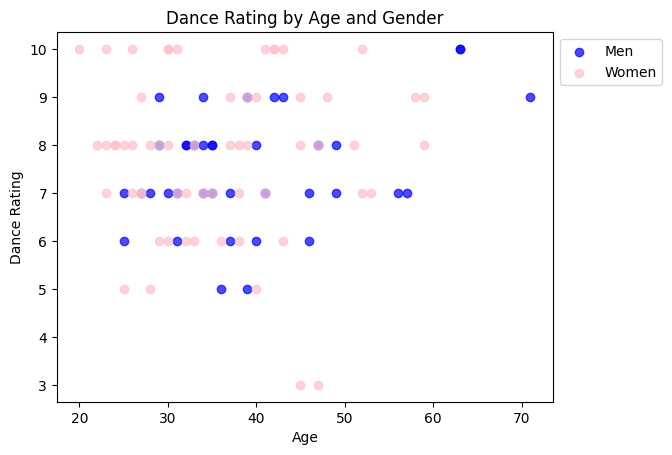

In [77]:
# cleaned Data

import pandas as pd
import matplotlib.pyplot as plt


# Create separate DataFrames for men and women
men_df = df_cleaned[(df_cleaned['Gender'] == 'Male') & (df_cleaned['Age'] > 0)]
women_df = df_cleaned[(df_cleaned['Gender'] == 'Female') & (df_cleaned['Age'] >0)]

# Create a scatter plot for men
plt.scatter(men_df['Age'], men_df['Dance Rating'], c='blue', label='Men', alpha=0.7)

# Create a scatter plot for women
plt.scatter(women_df['Age'], women_df['Dance Rating'], c='pink', label='Women', alpha=0.7)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Dance Rating')
plt.title('Dance Rating by Age and Gender')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [78]:
# # uncleaned data

# import pandas as pd
# import matplotlib.pyplot as plt


# # Create separate DataFrames for men and women
# men_df = df1[(df1['Gender'] == 'Male') & (df1['Age'] > 0)]
# women_df = df1[(df1['Gender'] == 'Female') & (df1['Age'] >0)]

# # Create a scatter plot for men
# plt.scatter(men_df['Age'], men_df['Dance Rating'], c='blue', label='Men', alpha=0.7)

# # Create a scatter plot for women
# plt.scatter(women_df['Age'], women_df['Dance Rating'], c='pink', label='Women', alpha=0.7)

# # Customize the plot
# plt.xlabel('Age')
# plt.ylabel('Dance Rating')
# plt.title('Dance Rating by Age and Gender')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.show()


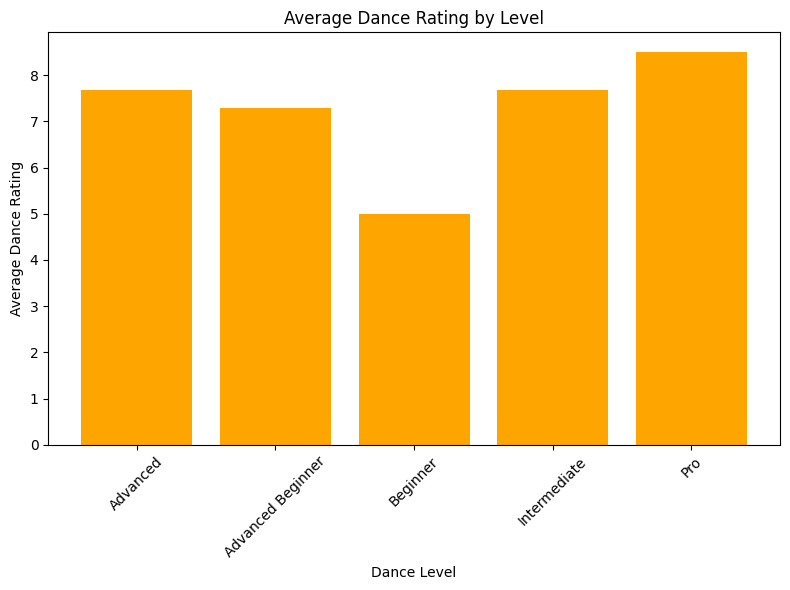

In [79]:
# dance rating and dance level
levels = df_cleaned['Level'].unique()
gk = df_cleaned.groupby('Level')
data = {
    'Level': levels.tolist(),
    'Dance Rating' : []
}
for x in levels:
    group = gk.get_group(x)
    data['Dance Rating'].append(group['Dance Rating'].mean())


df_ = pd.DataFrame(data)

level_ratings = df_.groupby('Level')['Dance Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(level_ratings['Level'], level_ratings['Dance Rating'], color='orange')
plt.xlabel('Dance Level')
plt.ylabel('Average Dance Rating')
plt.title('Average Dance Rating by Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


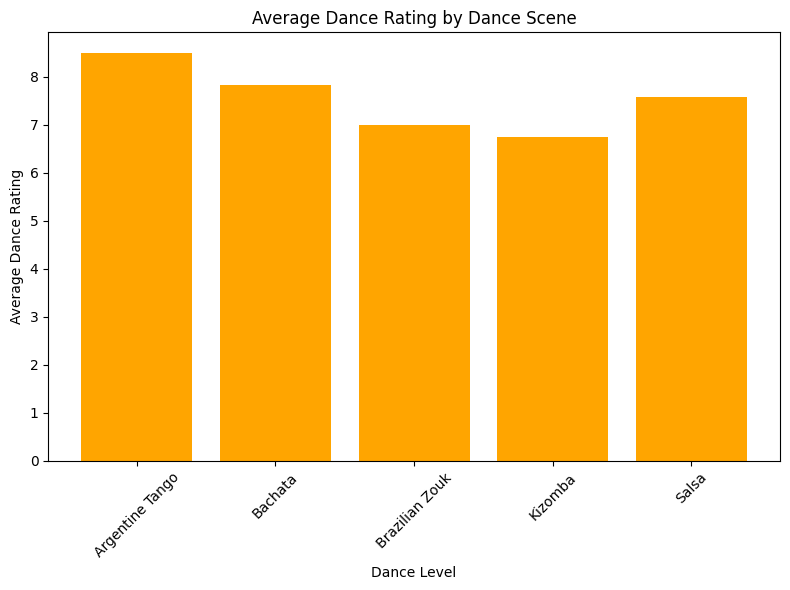

In [80]:
# # dance rating and dance level
# levels = df_cleaned['Level'].unique()
# gk = df_cleaned.groupby('Level')
# data = {
#     'Level': levels.tolist(),
#     'Dance Rating' : []
# }
# for x in levels:
#     group = gk.get_group(x)
#     data['Dance Rating'].append(group['Dance Rating'].mean())


# df_ = pd.DataFrame(data)

level_ratings = df_cleaned.groupby('Dance Scene')['Dance Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(level_ratings['Dance Scene'], level_ratings['Dance Rating'], color='orange')
plt.xlabel('Dance Level')
plt.ylabel('Average Dance Rating')
plt.title('Average Dance Rating by Dance Scene')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


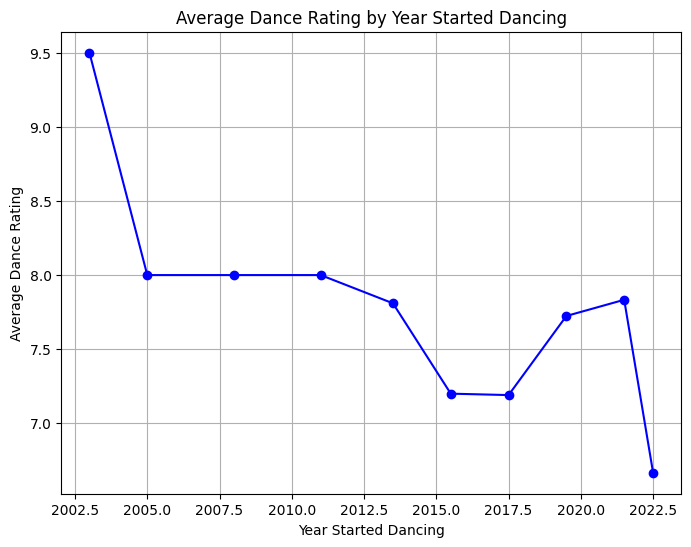

In [81]:
# average dance rating by year started dancing

import matplotlib.pyplot as plt

df_filtered = df_cleaned[df_cleaned['Year started dancing'] >= 2000]

# Group data by 'Year started dancing' and calculate the mean dance rating
year_ratings = df_filtered.groupby('Year started dancing')['Dance Rating'].mean().reset_index()

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(year_ratings['Year started dancing'], year_ratings['Dance Rating'], marker='o', linestyle='-', color='b')
plt.xlabel('Year Started Dancing')
plt.ylabel('Average Dance Rating')
plt.title('Average Dance Rating by Year Started Dancing')
plt.grid(True)

# Show the plot
plt.show()

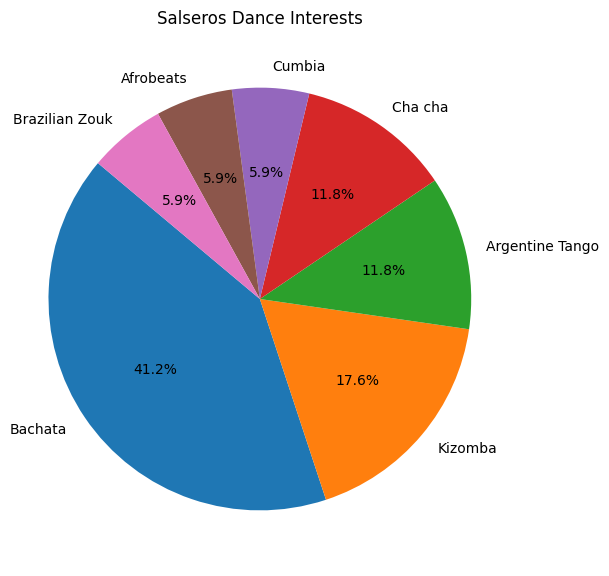

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


# df - unclened data with 10+ years
# Assuming you already have the 'salsa_interests' Series
salsa_interests = df[ (df['Dance Scene'] == 'Salsa')][ 'Most Interested']
salsa_interests = salsa_interests[salsa_interests != 'Salsa']
salsa_interests.unique()

# Calculate the value counts for each interest
interest_counts = salsa_interests.value_counts()

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Create a pie chart
ax.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Salseros Dance Interests')

# Adjust the position of the pie chart down
plt.subplots_adjust(top=1)  # You can adjust the top value as needed

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


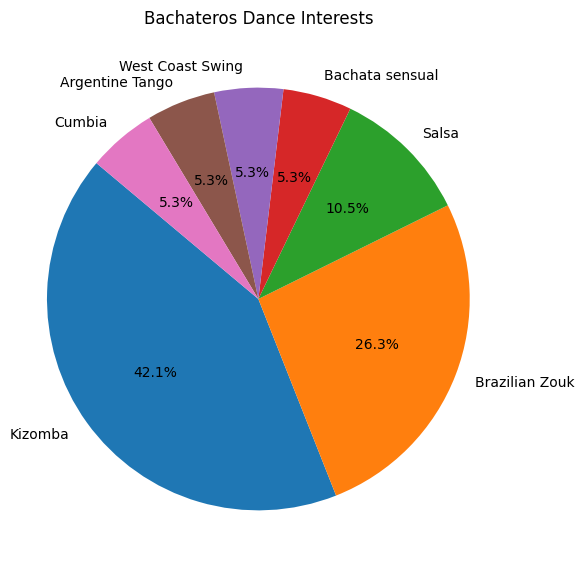

In [83]:
bachata_interests = df[ (df['Which dance do you dance the most?'] == 'Bachata')][ 'Which dance do you like/interests you the most?']
bachata_interests = bachata_interests[bachata_interests != 'Bachata']

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'salsa_interests' Series

# Calculate the value counts for each interest
interest_counts = bachata_interests.value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Bachateros Dance Interests')

plt.subplots_adjust(top=1)  # You can adjust the top value as needed

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [84]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


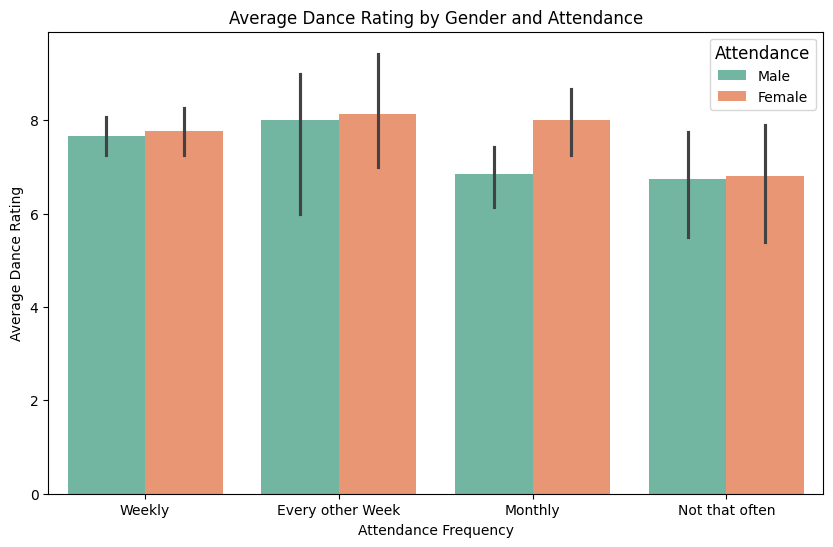

In [85]:
# dance rating and attendace


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filters = df_cleaned[df_cleaned['Gender'] != 'Gender Queer']
# Create a DataFrame
level_ratings = df_filters.groupby(['Attendance', 'Gender'])['Dance Rating'].mean().reset_index()

# Create a double bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filters, x='Attendance', y='Dance Rating', hue='Gender', palette='Set2')
plt.xlabel('Attendance Frequency')
plt.ylabel('Average Dance Rating')
plt.title('Average Dance Rating by Gender and Attendance')
plt.legend(title='Attendance', title_fontsize='12')
# plt.xticks(rotation=0)

# Show the plot
plt.show()


In [86]:
df_cleaned.to_csv('dance_data.csv')

In [87]:
df_bins.to_csv('bins_data.csv')

In [88]:


# average dance rating by year started dancing

#show with a line graph

In [101]:
df_bins

,Gender,City,Location,Friendly Follows?,Friendly Leads?,Attendance,Level,Dance Lessons,Opposite,Most Interested,...,Played an instrument,Age,Zodiac Sign,Timestamp,Leader or Follower,Dance Rating,Average Experience,Year started dancing,Starting Age,Experience Bins
0,Male,orlando,florida,Yes,Yes,Weekly,Advanced,Yes,Yes,Bachata,...,Yes,29,Gemini,9/24/2023,Lead,9.0,5.5,2017.5,23.5,"(4.25, 8.0]"
1,Male,berlin,germany,Yes,Yes,Weekly,Advanced,Yes,Yes,Salsa,...,Yes,41,Scorpio,9/24/2023,Lead,7.0,3.5,2019.5,37.5,"(0.462, 4.25]"
2,Male,stuart florida,florida,Yes,Yes,Every other Week,Advanced,Yes,Yes,Argentine Tango,...,No,71,Aquarius,9/24/2023,Lead,9.0,20.0,2003.0,51.0,"(19.25, 23.0]"
4,Male,orlando,florida,Yes,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,No,40,Aries,9/24/2023,Lead,6.0,9.5,2013.5,30.5,"(8.0, 11.75]"
5,Female,lake worth,florida,No,Not too sure/Can't Say,Weekly,Advanced,Yes,Yes,Cumbia,...,Yes,34,Capricorn,9/24/2023,Follow,7.0,5.5,2017.5,28.5,"(4.25, 8.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Female,orlando,florida,Yes,Yes,Monthly,Intermediate,Yes,Yes,Salsa,...,No,59,Aries,10/5/2023,Follow,8.0,3.5,2019.5,55.5,"(0.462, 4.25]"
132,Female,gainesville,florida,Somewhat,Somewhat,Not that often,Advanced,Yes,Yes,Salsa,...,Yes,30,Leo,10/5/2023,Follow,6.0,7.5,2015.5,22.5,"(4.25, 8.0]"
133,Female,little rock,arkansas,Yes,Yes,Weekly,Intermediate,Yes,Yes,Salsa,...,Yes,35,Libra,10/5/2023,Follow,7.0,5.5,2017.5,29.5,"(4.25, 8.0]"
134,Female,st petersburg,florida,Somewhat,Somewhat,Weekly,Advanced,Yes,Yes,Kizomba,...,Yes,23,Capricorn,10/7/2023,Follow,7.0,9.5,2013.5,13.5,"(8.0, 11.75]"


In [100]:
df_bins['City'] = df_bins['City'].apply(lambda x: str(x).lower())
df_bins['Location'] = df_bins['Location'].apply(lambda x: str(x).lower())


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2513684559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['City'] = df_bins['City'].apply(lambda x: str(x).lower())
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\2513684559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['Location'] = df_bins['Location'].apply(lambda x: str(x).lower())


In [125]:
# Regions are based off of those at
# http://nationalgeographic.org/maps/united-states-regions/
# Because those made more sense to me than the census regions
# Includes District of Columbia as a state
regions_to_states = {
    'South': ['West Virginia', 'District of Columbia', 'Maryland', 'Virginia',
              'Kentucky', 'Tennessee', 'North Carolina', 'Mississippi',
              'Arkansas', 'Louisiana', 'Alabama', 'Georgia', 'South Carolina',
              'Florida', 'Delaware'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'West': ['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana',
             'Wyoming', 'Utah', 'Colorado', 'Alaska', 'Hawaii'],
    'Midwest': ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota',
                'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana',
                'Ohio'],
    'Northeast': ['Maine', 'Vermont', 'New York', 'New Hampshire', 'Massachusetts',
                  'Rhode Island', 'Connecticut', 'New Jersey', 'Pennsylvania']
}

states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

In [190]:

def get_region(state):
    for x in regions_to_states:
        states = [ x.lower() for x in regions_to_states.get(x)]
        if state in states:
            return x
df_bins['Region'] = df_bins['Location'].apply(lambda x: get_region(x))


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\1472791449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['Region'] = df_bins['Location'].apply(lambda x: get_region(x))


In [137]:
!pip install countrydetails


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     ------- -------------------------------- 0.6/3.5 MB 19.8 MB/s eta 0:00:01
     ---------------- ----------------------- 1.4/3.5 MB 18.4 MB/s eta 0:00:01
     -------------------------- ------------- 2.4/3.5 MB 18.8 MB/s eta 0:00:01
     ------------------------------------ --- 3.3/3.5 MB 18.9 MB/s eta 0:00:01
     ---------------------------------------- 3.5/3.5 MB 16.1 MB/s eta 0:00:00


In [205]:

def get_region(location):
    if us.states.lookup(location):
        return "North America"
    else:
        if location == "district of colombia":
            return "North America"
        from Countrydetails import country

        country = country.country_details(location) 
        return country.info()['continent']


df_bins['Continent'] = df_bins['Location'].apply(lambda x: get_region(x))
df_bins['Continent'] = df_bins['Continent'].apply(lambda x: x.strip())


C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\409206280.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['Continent'] = df_bins['Location'].apply(lambda x: get_region(x))
C:\Users\arytn\AppData\Local\Temp\ipykernel_12096\409206280.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bins['Continent'] = df_bins['Continent'].apply(lambda x: x.strip())


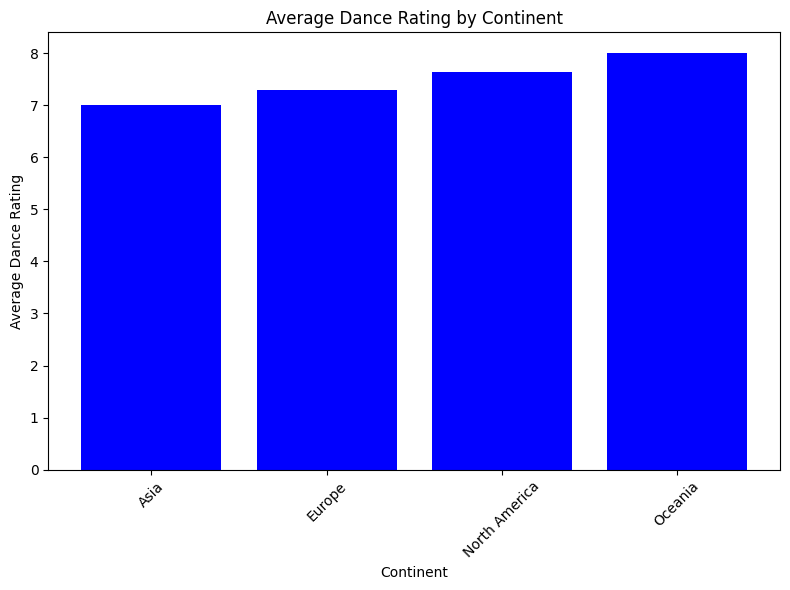

In [208]:
continents = df_bins['Continent'].unique()
data = {
    'Continent': continents,
    'Dance Rating' : []
}

for x in continents:
    avg = df_bins[df_bins['Continent'] == x]['Dance Rating'].mean()
    data['Dance Rating'].append(avg)

df_ = pd.DataFrame(data)

continents = df_.groupby('Continent')['Dance Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(continents['Continent'], continents['Dance Rating'], color='blue')
plt.xlabel('Continent')
plt.ylabel('Average Dance Rating')
plt.title('Average Dance Rating by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


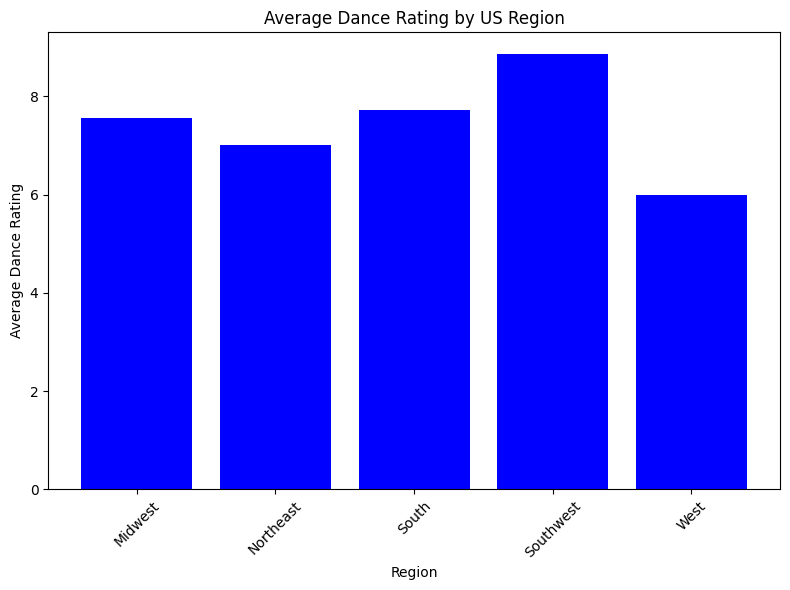

In [210]:

continents = df_bins['Region'].unique()
data = {
    'Region': continents,
    'Dance Rating' : []
}

for x in continents:
    avg = df_bins[df_bins['Region'] == x]['Dance Rating'].mean()
    data['Dance Rating'].append(avg)

df_ = pd.DataFrame(data)

continents = df_.groupby('Region')['Dance Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(continents['Region'], continents['Dance Rating'], color='blue')
plt.xlabel('Region')
plt.ylabel('Average Dance Rating')
plt.title('Average Dance Rating by US Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [204]:
location = df_bins['Location'].unique()

for x in location:
    avg = df_bins[(df_bins['Location'] == x) & (df_bins['Continent'] == 'North America')]['Dance Rating'].mean()
    print(x,avg)

florida 7.764705882352941
germany nan
texas 9.2
michigan 7.0
united kingdom nan
australia nan
new york 7.0
uk nan
illinois 8.666666666666666
minnesota 8.0
romania nan
california 7.0
canada 8.0
tennessee 7.0
japan nan
iowa 7.0
indiana 8.0
colorado 7.0
virginia 7.666666666666667
wisconsin 7.0
district of colombia 8.0
nebraska nan
arizona 8.0
georgia 6.5
massachusetts 7.0
washington 3.0
switzerland nan
kentucky 8.0
france nan
costa rica 5.0
missouri 6.0
north carolina 9.0
arkansas 7.0


In [211]:
df_bins['Continent']

0      North America
1             Europe
2      North America
4      North America
5      North America
           ...      
131    North America
132    North America
133    North America
134    North America
135    North America
Name: Continent, Length: 110, dtype: object

In [200]:
df_bins.to_csv('bins_data.csv')